#### DWM-08P: Take BreastCancer.csv file. (1) (a) Find which attributes should be trivially excluded for classification. (b) Divide the data into Training Set (70%) and Test Set (30%) using Stratified Sampling method. (2) Using Logistic Regression to train the model using the Training Set. (3) Write the Model and use the model for testing it using Test Set. Determine the accuracy of the Classifier.

In [23]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Importing dataset
data = pd.read_csv('BreastCancer.csv')
data

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
694,695,776715,3,1,1,1,3,2.0,1,1,1,benign
695,696,841769,2,1,1,1,2,1.0,1,1,1,benign
696,697,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,698,897471,4,8,6,4,3,4.0,10,6,1,malignant


In [25]:
# Deletig the column that has the index
data = data.drop('Unnamed: 0',axis=1)

In [26]:
# Checking for any null values
data.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [27]:
# Handling the null values in Bare.nuclei and replacing Nan with the mean of the column 
# data['Bare.nuclei'].fillna(data['Bare.nuclei'].median(), inplace=True)
def fill_na_with_class_mean(df, column, class_column):
    # Calculate the mean of the column for each class
    class_means = df.groupby(class_column)[column].mean()
    
    # Define a function that will be applied to each row
    def fill_na(row):
        # If the value in the specified column is NaN, replace it with the class mean
        if pd.isnull(row[column]):
            return class_means[row[class_column]]
        else:
            return row[column]
    
    # Apply the function to the DataFrame
    df[column] = df.apply(fill_na, axis=1)

In [28]:
# Checking the average of class benign and malignant
t = data.groupby('Class')['Bare.nuclei'].mean()
t

Class
benign       1.346847
malignant    7.627615
Name: Bare.nuclei, dtype: float64

In [29]:
# Calling the function defined above filling the null values
fill_na_with_class_mean(data, 'Bare.nuclei', 'Class')

In [30]:
# Rechecking that all the null values are replaced 
data.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [31]:
# Calculating the ration of benign is to malignant
ratio = (data['Class'] == 'benign').sum() / (data['Class'] == 'malignant').sum()
ratio # Ratio = 458 / 241

1.900414937759336

In [32]:
# There is no need of encoding Class column as it is the dependent variable(y)
# But we encode the Class column to find correlation and make a heatmap
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Class_enc'] = le.fit_transform(data['Class'])

In [33]:
# Deleting the Class column as we encoded it in Class_enc
data = data.drop('Class', axis=1)

<Axes: >

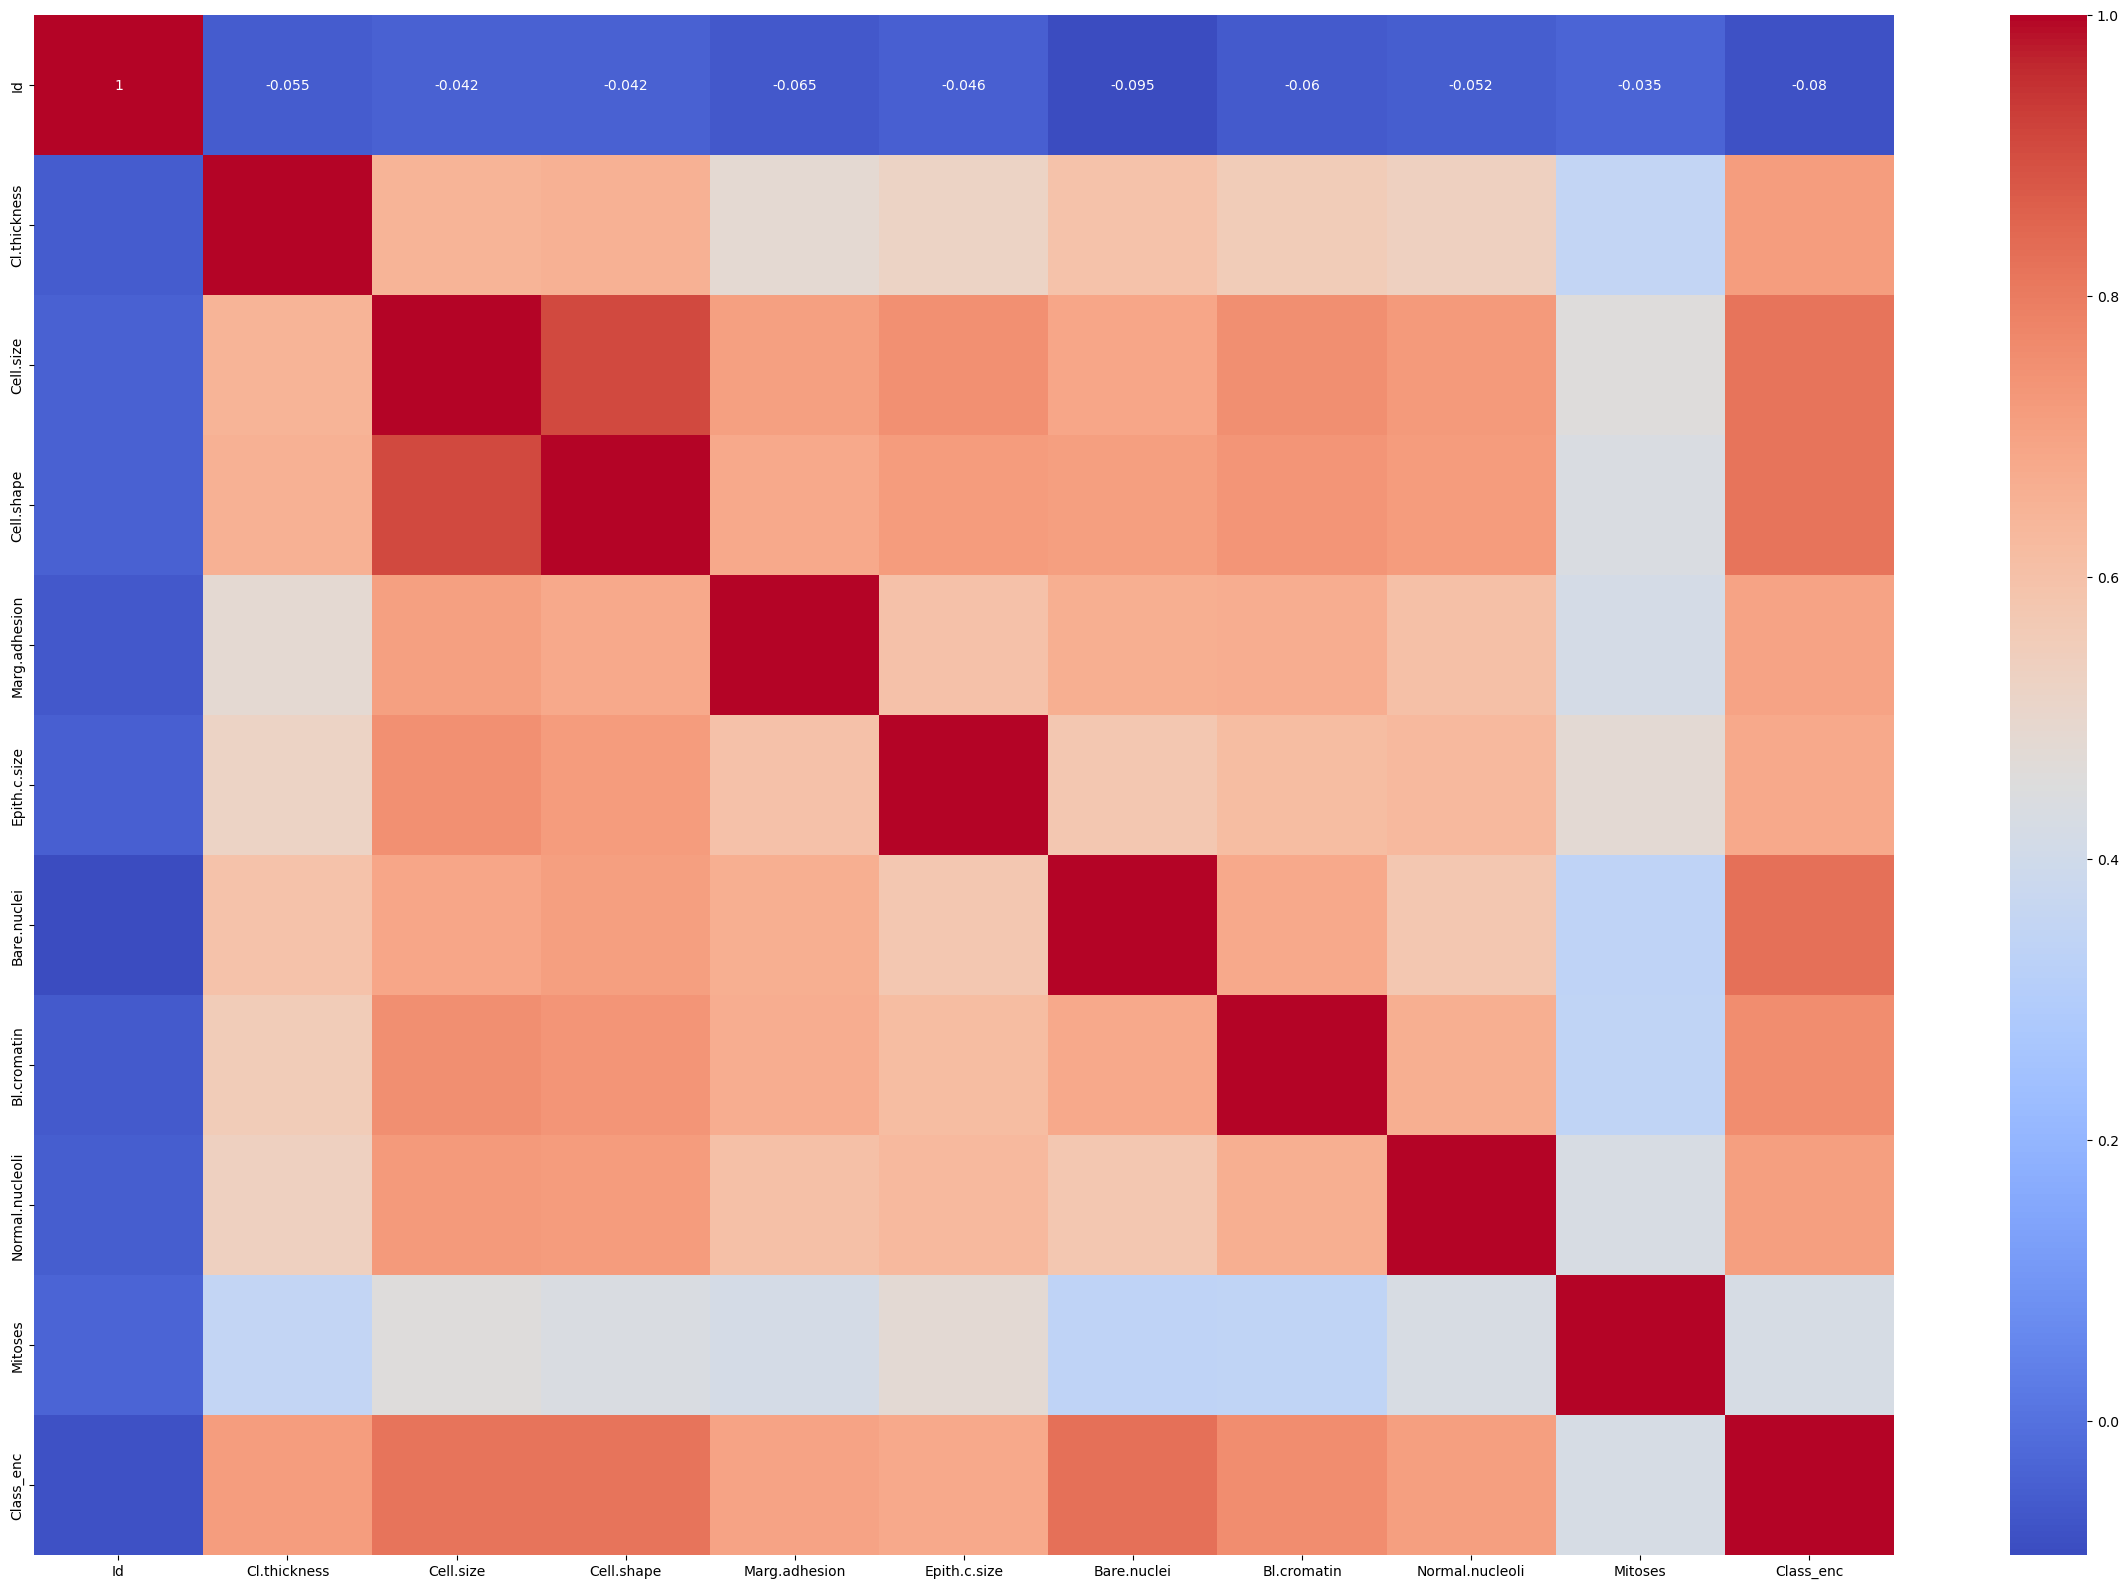

In [34]:
# Plotting a heatmap
x = data.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(x,annot=True,cmap='coolwarm')

In [35]:
# Finding the correlation of all the columns with the Class column
correlations = data.corr()['Class_enc'].abs().sort_values()

# Print the correlations
print(correlations)

Id                 0.080226
Mitoses            0.423170
Epith.c.size       0.682785
Marg.adhesion      0.696800
Normal.nucleoli    0.712244
Cl.thickness       0.716001
Bl.cromatin        0.756616
Cell.size          0.817904
Cell.shape         0.818934
Bare.nuclei        0.824843
Class_enc          1.000000
Name: Class_enc, dtype: float64


In [36]:
# Filtering out the columns that have correlation of less than 0.4 with Class_enc
low_correlation_cols = correlations[correlations < 0.4].index.tolist()
low_correlation_cols

['Id']

In [37]:
# We have deleted all the columns that have correlation less than 0.4 with the Class_enc
data1 = data.drop(low_correlation_cols,axis=1)

In [38]:
# Defining the independent variable (X) and dependent variable (y)
X = data1.drop(["Class_enc"], axis = 1)
y = data1["Class_enc"]

# Splitting the dataset into 70% training and 30% testing data with use of stratified sampling method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [39]:
# Calling the Logistic Regression algorithm from sklearn library
# Passing the output of Linear regression to sigmoid function gives output of Logistic regression 
# Then adding gradient descent and recalculating the weights and bias
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
# Using the fit function to fit and train the training data to Logistic Regression algorithm
reg.fit(X_train,y_train)
# Using predict function to predict the test data and save it in y_pred variable
y_pred_lr = reg.predict(X_test)

In [40]:
# Using the accuracy_score funtion to find the accuracy of the model 
# accuracy_score = no. of correct prediction(TP + TN)/Total no. of predictions(TP+TN+FP+FN) 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy of the Classifier: {accuracy}')

Accuracy of the Classifier: 0.9714285714285714


In [41]:
# Making a Confusion Matrix to check the FP and FN 
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[133,   5],
       [  1,  71]], dtype=int64)

In [45]:
# Bagging using RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")

Random Forest Accuracy: 0.976


In [46]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[133,   5],
       [  0,  72]], dtype=int64)

In [48]:
# Create a DataFrame for custom input data
custom_input = pd.DataFrame({
    'Cl.thickness': [3],
    'Cell.size': [1],
    'Cell.shape': [1],
    'Marg.adhesion': [1],
    'Epith.c.size': [2],
    'Bare.nuclei': [1],  # This value can vary depending on the dataset, ensure it's appropriate
    'Bl.cromatin': [3],
    'Normal.nucleoli': [1],
    'Mitoses': [1]
})

# Make predictions using the trained Logistic Regression
pred_reg = reg.predict(custom_input)
# Make predictions using the trained Random Forest classifier
pred_rf = random_forest.predict(custom_input)

# Print the predictions
print("Prediction of Logistic Regression:", pred_reg)
print("Prediction of Random Forest Classifier:", pred_rf)

Prediction of Logistic Regression: [0]
Prediction of Random Forest Classifier: [0]
